# **Exploratory Data Analysis (EDA) - London Weather Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats

### Load Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving london_weather.csv to london_weather (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv("london_weather.csv")  # File is saved in Colab's working directory

### Data Preprocessing

In [ ]:
# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

# Handle missing values (impute with mean for numerical columns)
df.fillna(df.mean(), inplace=True)

### Dataset Overview

In [ ]:
print("Dataset Info:")
display(df.info())

print("First Few Rows:")
display(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       15341 non-null  float64       
 2   sunshine          15341 non-null  float64       
 3   global_radiation  15341 non-null  float64       
 4   max_temp          15341 non-null  float64       
 5   mean_temp         15341 non-null  float64       
 6   min_temp          15341 non-null  float64       
 7   precipitation     15341 non-null  float64       
 8   pressure          15341 non-null  float64       
 9   snow_depth        15341 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.2 MB


None

First Few Rows:


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


### Summary Statistics

In [ ]:
print("Summary Statistics:")
display(df.describe())

Summary Statistics:


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
count,15341,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000
mean,2000-01-01 00:00:00,5.268242,4.350238,118.756951,15.388777,11.475511,7.559867,1.668634,101536.605594,0.037986
min,1979-01-01 00:00:00,0.000000,0.000000,8.000000,-6.200000,-7.600000,-11.800000,0.000000,95960.000000,0.000000
25%,1989-07-02 00:00:00,4.000000,0.500000,41.000000,10.500000,7.100000,3.500000,0.000000,100920.000000,0.000000
50%,2000-01-01 00:00:00,6.000000,3.500000,95.000000,15.000000,11.400000,7.800000,0.000000,101620.000000,0.000000
75%,2010-07-02 00:00:00,7.000000,7.200000,186.000000,20.300000,16.000000,11.800000,1.600000,102240.000000,0.000000
max,2020-12-31 00:00:00,9.000000,16.000000,402.000000,37.900000,29.000000,22.300000,61.800000,104820.000000,22.000000
std,NaN,2.068790,4.028339,88.843200,6.553472,5.722981,5.326409,3.737809,1049.585735,0.519373


### Univariate Analysis - Histograms

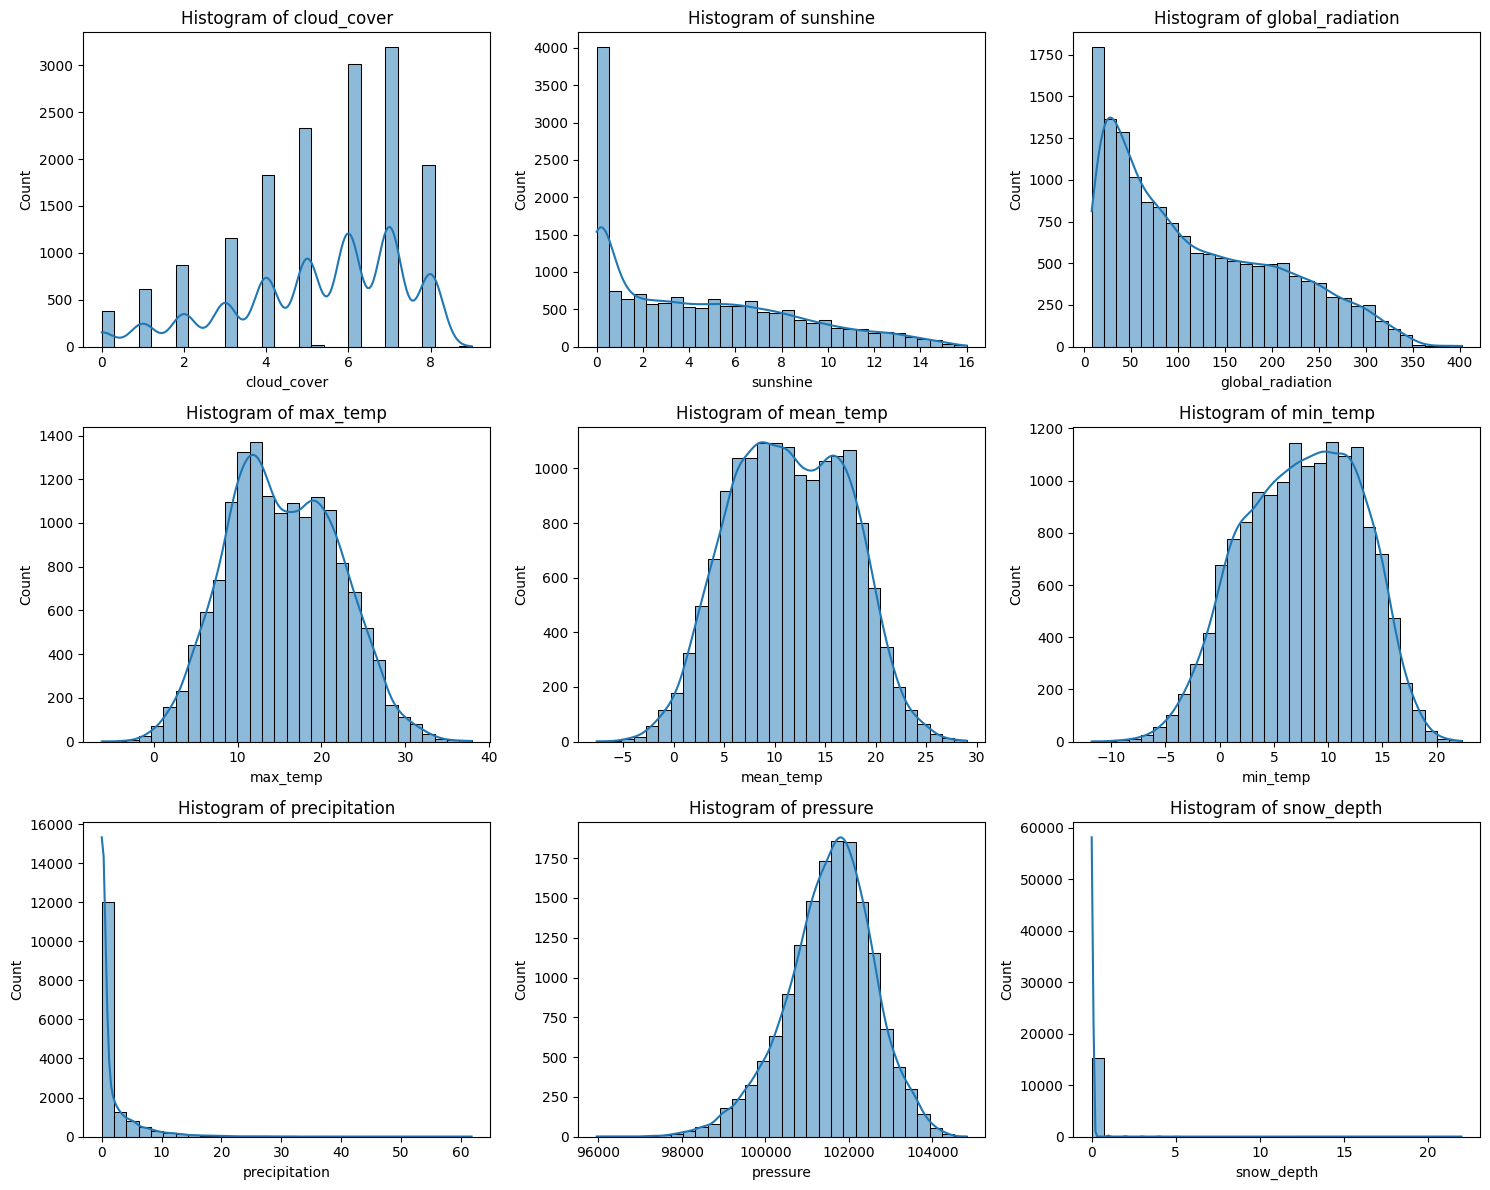

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
columns = ['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth']
for i, col in enumerate(columns):
    sns.histplot(df[col], bins=30, ax=axes[i//3, i%3], kde=True)
    axes[i//3, i%3].set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

### Boxplots

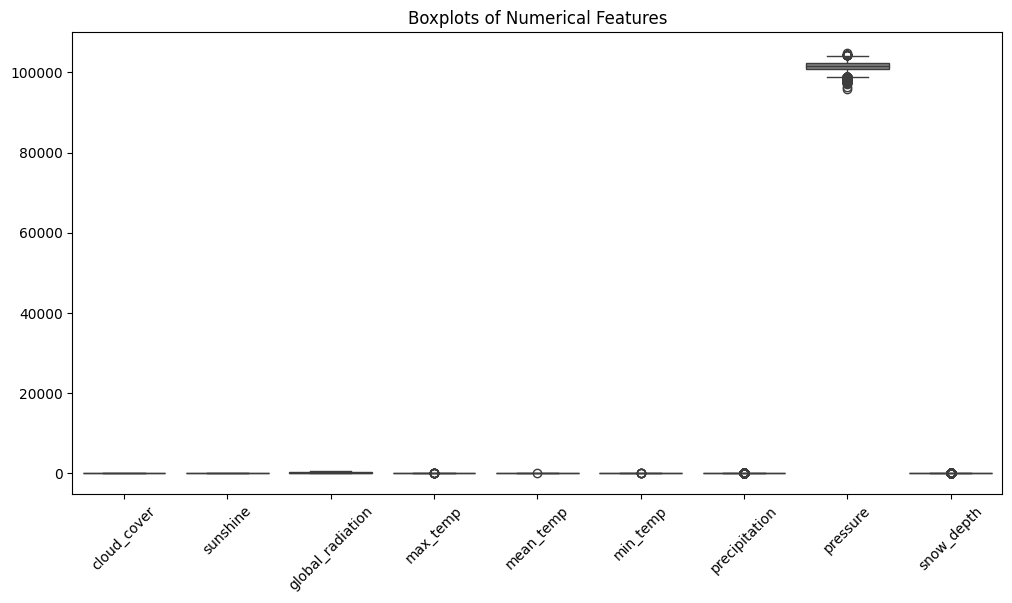

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns])
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Features")
plt.show()

### Correlation Analysis - Heatmap

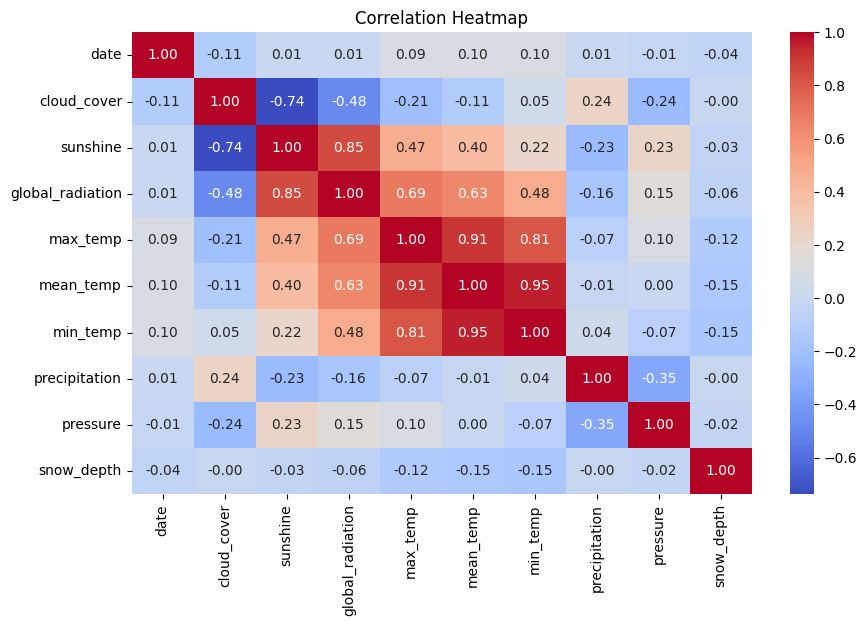

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

### Multivariate Analysis - Interactive Bubble Plot

In [ ]:
fig = px.scatter(df, x='max_temp', y='sunshine', size='global_radiation', color='precipitation',
                 hover_data=['date'], title='Interactive Bubble Plot: Temperature vs Sunshine')
fig.show()

### Violin Plot

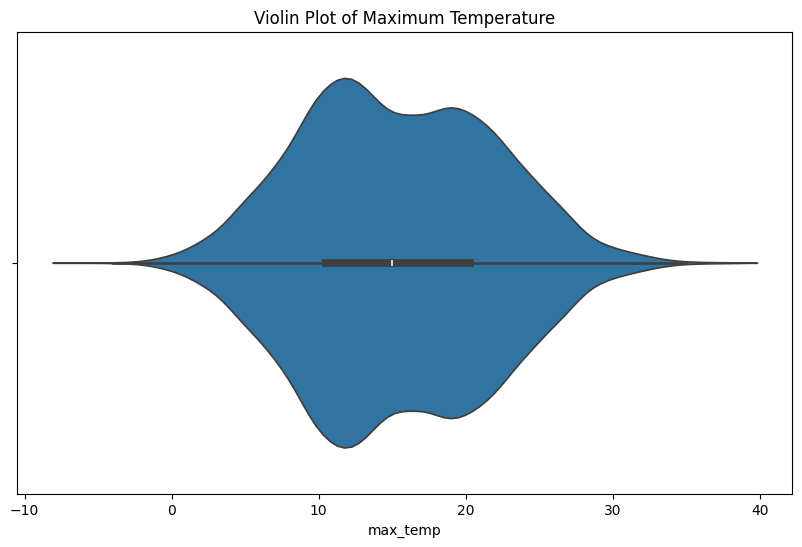

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['max_temp'])
plt.title("Violin Plot of Maximum Temperature")
plt.show()

### Line Plot

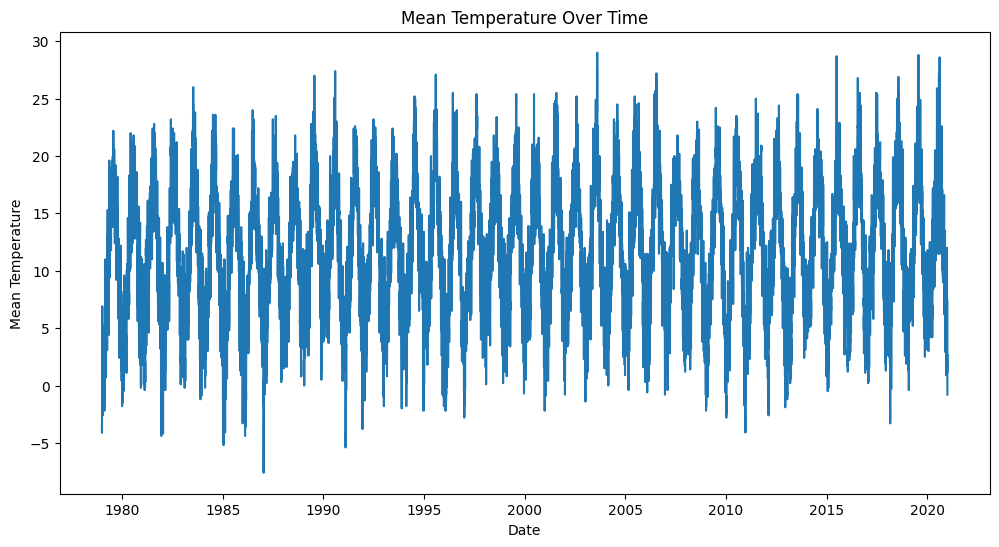

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['date'], y=df['mean_temp'])
plt.title("Mean Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

### Additional Plots

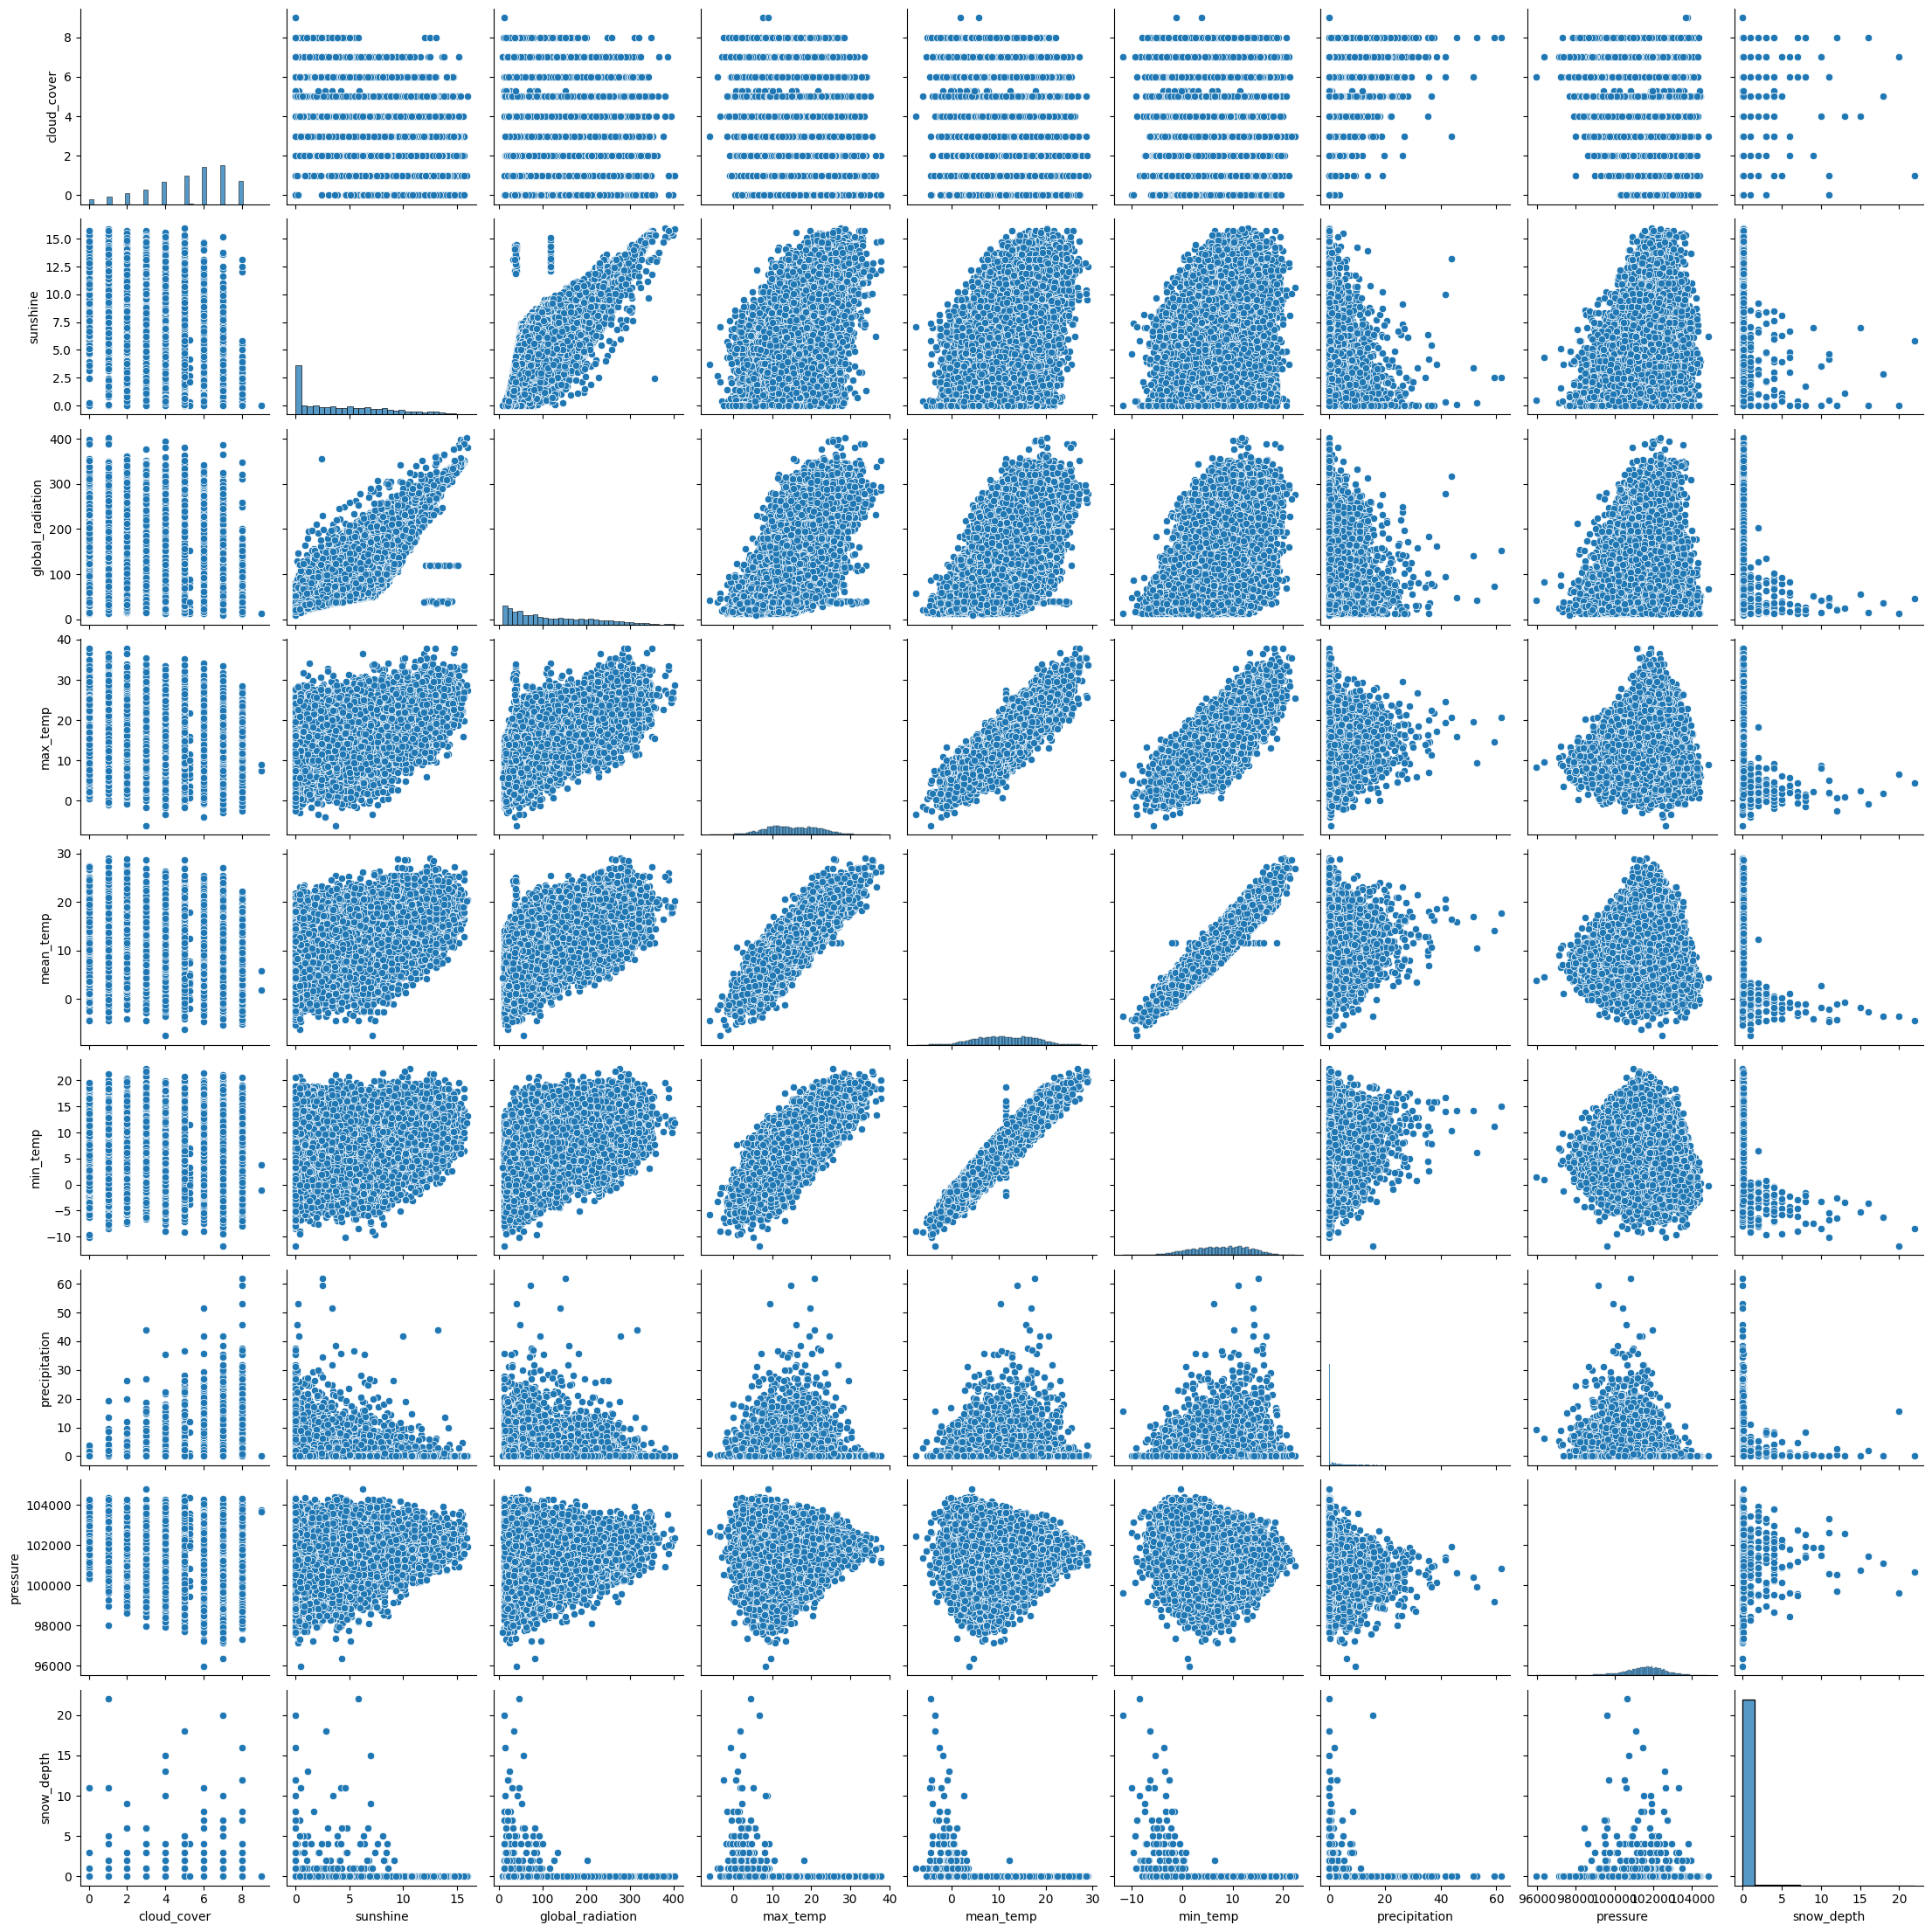

In [ ]:
# Pair Plot
sns.pairplot(df[columns])
plt.show()

<ipython-input-24-1adbc0b9b782>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




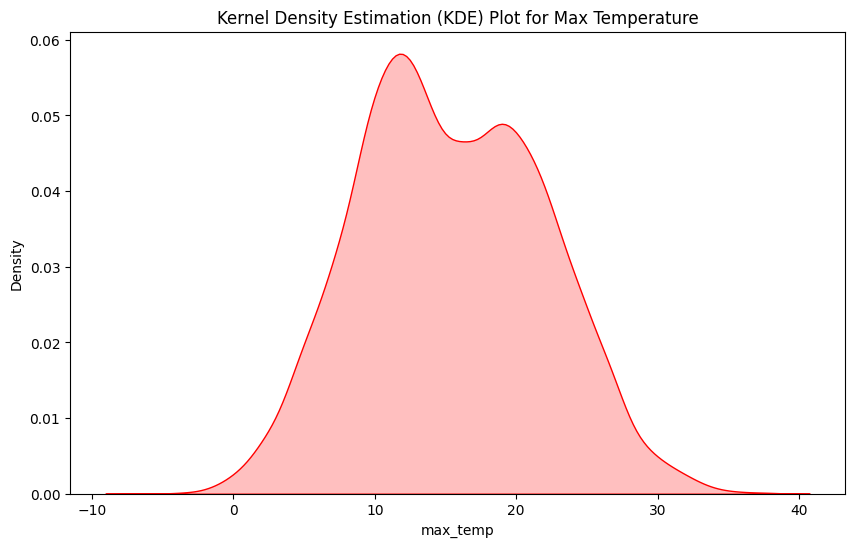

In [ ]:
# KDE Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['max_temp'], shade=True, color='r')
plt.title("Kernel Density Estimation (KDE) Plot for Max Temperature")
plt.show()

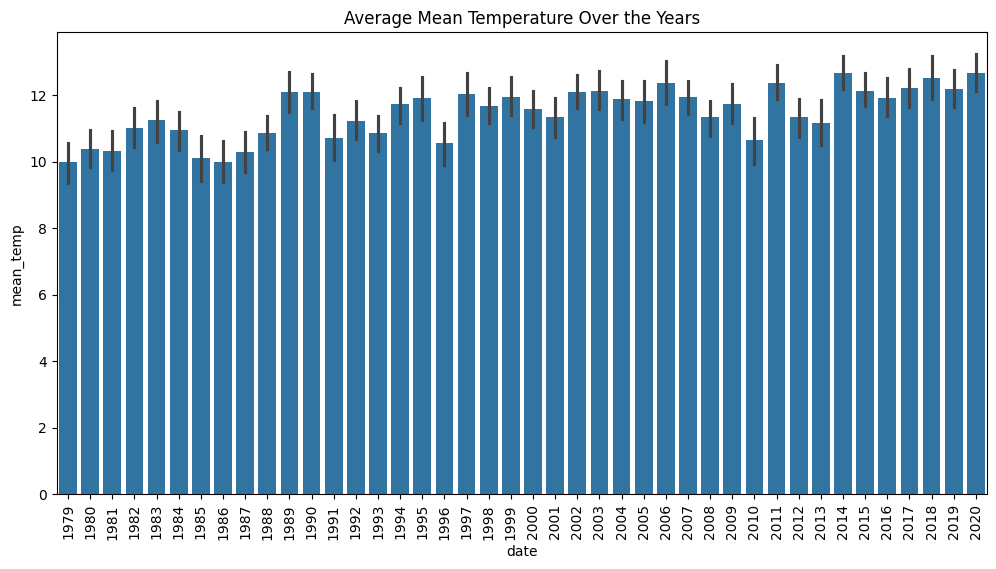

In [ ]:
# Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=df['date'].dt.year, y=df['mean_temp'])
plt.xticks(rotation=90)
plt.title("Average Mean Temperature Over the Years")
plt.show()

### Statistical Test - T-test

In [ ]:
before_2000 = df[df['date'] < '2000-01-01']['mean_temp']
after_2000 = df[df['date'] >= '2000-01-01']['mean_temp']
t_stat, p_value = stats.ttest_ind(before_2000, after_2000, nan_policy='omit')
print(f"T-test: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

T-test: t-statistic = -9.3487, p-value = 0.0000
